In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os 

In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/breast cancer.ipynb'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
nRowsRead = 1000
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV files/METABRIC_RNA_Mutation.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'METABRIC_RNA_Mutation.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 693 columns


In [ ]:
df1.head(5)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
corr = pd.pivot_table(df1, columns=['overall_survival'])

In [ ]:

bestDeathCorr30 = corr.iloc[:,0].sort_values(ascending=False).head(30)

In [ ]:
bestDeathCorr30

patient_id                       2497.385047
overall_survival_months           101.688474
age_at_diagnosis                   63.350729
tumor_size                         28.906191
mutation_count                      5.594231
nottingham_prognostic_index         4.276288
lymph_nodes_examined_positive       2.671028
neoplasm_histologic_grade           2.530097
cohort                              1.942056
tumor_stage                         1.861167
radio_therapy                       0.635514
hormone_therapy                     0.592523
aph1a                               0.280890
foxp1                               0.241020
ccnb1                               0.236953
akt1s1                              0.232900
chemotherapy                        0.218692
rassf1                              0.204591
mmp14                               0.199585
stk11                               0.184761
epcam                               0.157607
thsd7a                              0.154287
rps6kb2   

In [ ]:
bestLifeCorr30 = corr.iloc[:,1].sort_values(ascending=False).head(30)

In [ ]:
bestLifeCorr30

patient_id                       1685.795699
overall_survival_months           156.389176
age_at_diagnosis                   55.827376
tumor_size                         22.895022
mutation_count                      4.428899
nottingham_prognostic_index         3.841194
neoplasm_histologic_grade           2.333333
tumor_stage                         1.638393
cohort                              1.533333
lymph_nodes_examined_positive       1.247312
radio_therapy                       0.709677
hormone_therapy                     0.651613
cdkn2c                              0.540783
hsd17b11                            0.488904
syne1                               0.447815
spry2                               0.422512
igf1                                0.420654
folr2                               0.417026
casp8                               0.393551
pdgfra                              0.372744
psen1                               0.372268
zfp36l1                             0.361655
lama2     

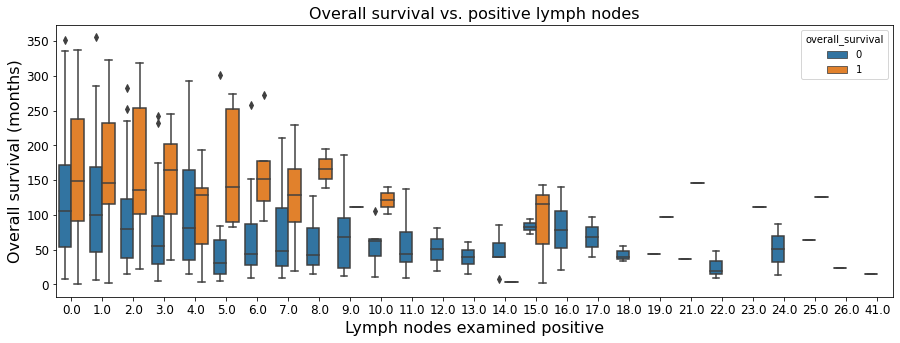

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival_months', hue='overall_survival', data=df1) #ax=axes[0, 0]
plt.xlabel("Lymph nodes examined positive", fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel("Overall survival (months)", fontsize=16)
plt.yticks(fontsize=12)
plt.title("Overall survival vs. positive lymph nodes", fontsize=16)
plt.savefig("")

In [ ]:
survivalMonths = df1.groupby(by='overall_survival')
survivalMonthsMean = survivalMonths.mean()['overall_survival_months']
survivalMonthsStd = survivalMonths.std()['overall_survival_months']

In [ ]:
print (survivalMonthsMean)
print(survivalMonthsStd)

overall_survival
0    101.688474
1    156.389176
Name: overall_survival_months, dtype: float64
overall_survival
0    74.877092
1    77.879029
Name: overall_survival_months, dtype: float64


In [ ]:
treatmentList = ["type_of_breast_surgery", "chemotherapy", "hormone_therapy", "radio_therapy"]

In [ ]:
dfTreatments = df1[treatmentList]
dfTreatments["type_of_breast_surgery"] = dfTreatments["type_of_breast_surgery"].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dfTreatments.rename(columns={"type_of_breast_surgery": "Mastectomy", "chemotherapy": "Chemotherapy", "hormone_therapy": "Hormone Therapy", "radio_therapy": "Radio Therapy"}, inplace=True)
dfTreatmentsCorr = dfTreatments.corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


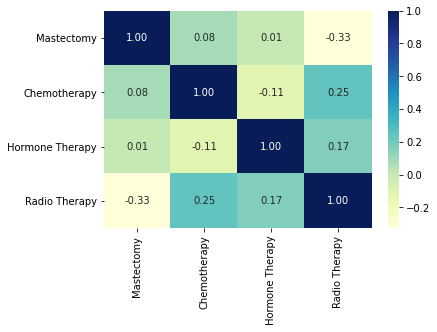

In [ ]:
sns.heatmap(dfTreatmentsCorr, cmap = "YlGnBu", annot=True, fmt=".2f")

In [ ]:
dfTreatmentGroupsMean = pd.pivot_table(df1, columns = treatmentList, index = 'overall_survival', values = 'overall_survival_months').mean()
df1TreatmentGroupsStd = pd.pivot_table(df1, columns = treatmentList, index = 'overall_survival', values = 'overall_survival_months').std()


In [ ]:
df2TreatmentGroups = pd.pivot_table(df1, columns = treatmentList, index = 'overall_survival', values = 'overall_survival_months', aggfunc='count').sum().sort_values(ascending=False)

In [ ]:
treatmentData = pd.DataFrame({'Mean Months Survived': dfTreatmentGroupsMean, "Std Months Survived": df1TreatmentGroupsStd, 'Treatments': df2TreatmentGroups}) 
treatmentData = treatmentData.fillna(0)

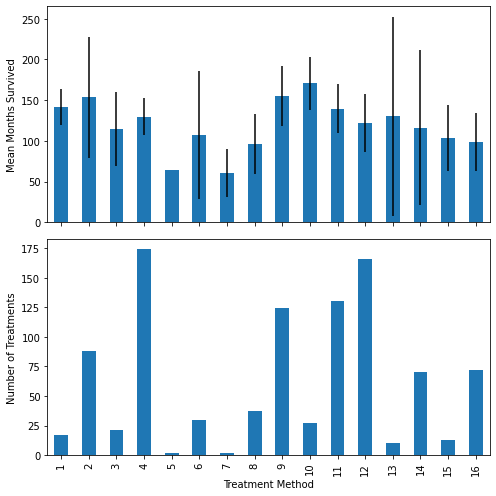

In [ ]:
treatmentData.index = range(1,17)
unstackedTreatmentData = treatmentData
f, axes = plt.subplots(2, 1, figsize = (7,7), sharex=True)
meanMonths = unstackedTreatmentData.plot(kind='bar', y='Mean Months Survived', legend=False, yerr='Std Months Survived', ax=axes[0])
meanMonths.set_ylabel("Mean Months Survived")
numTreatments = unstackedTreatmentData.plot(kind='bar', y='Treatments', legend=False, ax=axes[1])
numTreatments.set_ylabel("Number of Treatments")
numTreatments.set_xlabel("Treatment Method")
plt.tight_layout()


In [ ]:
mastectomyCounts = (dfTreatments["Mastectomy"].value_counts()[1]/dfTreatments["Mastectomy"].value_counts().sum())*100
chemoCounts = (dfTreatments["Chemotherapy"].value_counts()[1]/dfTreatments["Chemotherapy"].value_counts().sum())*100
hormoneCounts = (dfTreatments["Hormone Therapy"].value_counts()[1]/dfTreatments["Hormone Therapy"].value_counts().sum())*100
radioCounts = (dfTreatments["Radio Therapy"].value_counts()[1]/dfTreatments["Radio Therapy"].value_counts().sum())*100

In [ ]:
treatmentSurvivalDict = {'Mastectomy': mastectomyCounts, 'Chemotherapy': chemoCounts, 'Hormone Therapy':hormoneCounts, 'Radio Therapy': radioCounts}

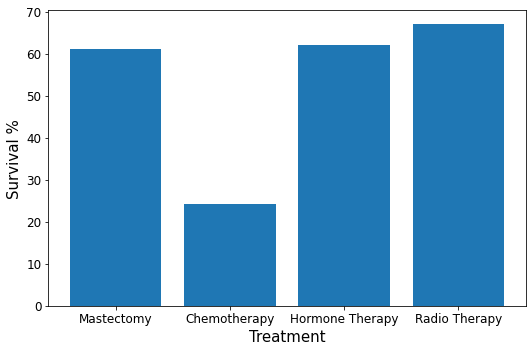

In [ ]:
plt.figure(figsize=(7.5,5))
plt.bar(list(treatmentSurvivalDict.keys()), list(treatmentSurvivalDict.values()))
plt.xlabel("Treatment", fontsize=15)
plt.ylabel("Survival %", fontsize=15)
plt.xticks(size=12)
plt.yticks(size=12)

plt.tight_layout()

In [ ]:
df1UniqueMutations = df1.drop(columns=list(df1.iloc[:,0:-173].columns))

In [ ]:
df1GroupedUniqueMutations = pd.DataFrame({"Unique Mutations": df1UniqueMutations.nunique()})
df1GroupedUniqueMutations.sort_values(by='Unique Mutations', ascending=False).head(10)

,Unique Mutations
tp53_mut,212
muc16_mut,140
syne1_mut,103
pik3ca_mut,99
map3k1_mut,99
ahnak2_mut,98
kmt2c_mut,96
gata3_mut,85
cdh1_mut,80
dnah11_mut,72


In [ ]:
df1UniqueMutationsBinary = df1UniqueMutations.applymap(lambda x: 1 if x != '0' else 0)
corr = df1UniqueMutationsBinary.corr().fillna(0)

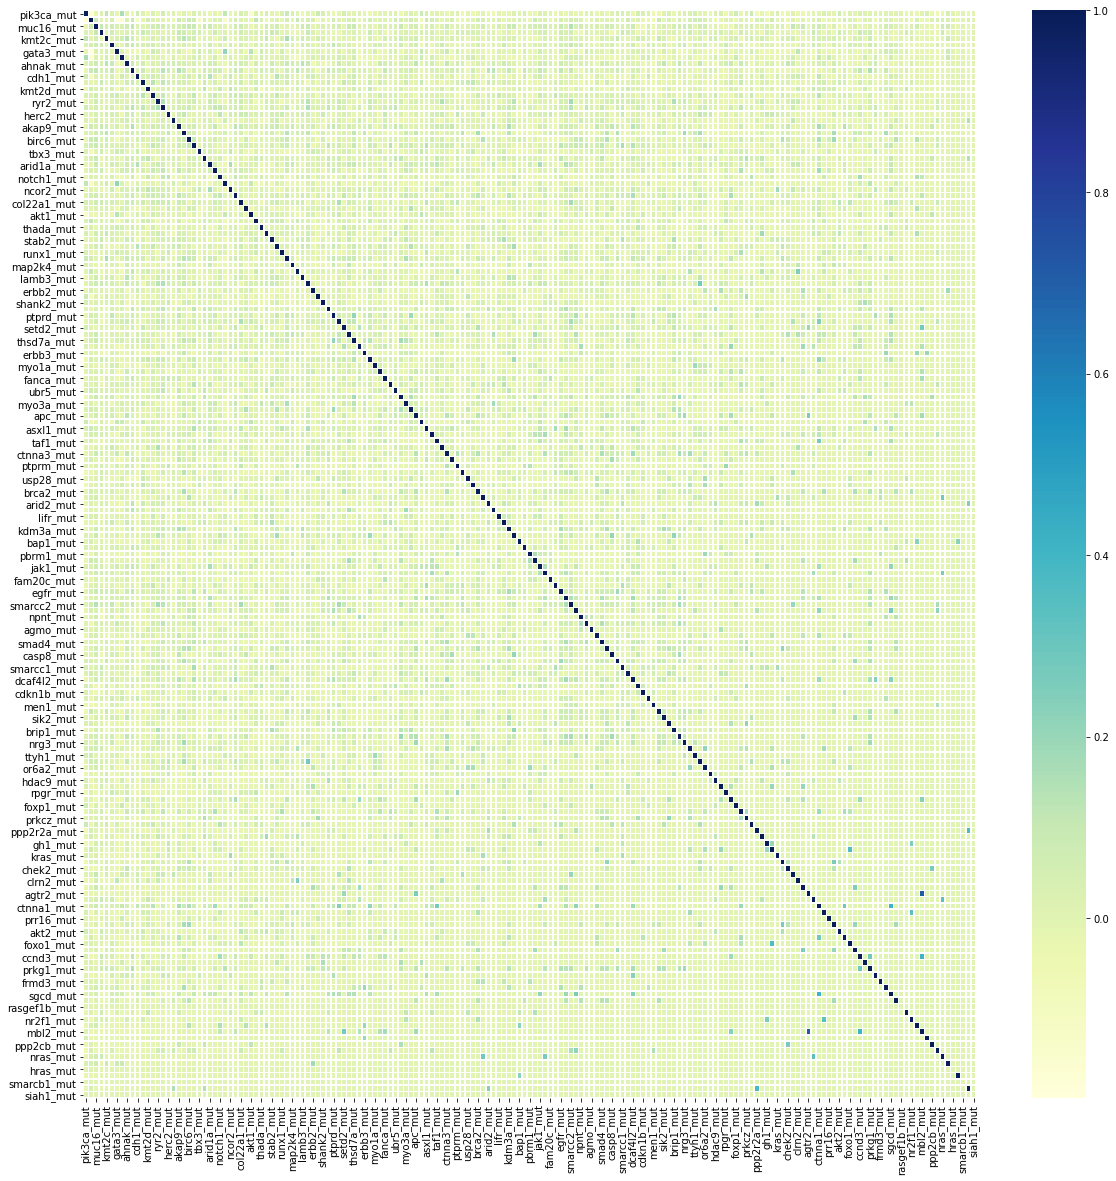

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap = "YlGnBu", linewidths=0.5)

In [ ]:
arr = np.argsort(-corr.values, axis=1)
corrValue = corr.apply(lambda row: row.nlargest(2).values[-1],axis=1)
df2UniqueMutationsBinary = pd.DataFrame({'Correlated Mutation': corr.columns[arr[1]], 'Pearson Correlation': corrValue}, index=corr.index)

In [ ]:
bestMutation = df2UniqueMutationsBinary.sort_values(by = 'Pearson Correlation', ascending=False)

In [ ]:
bestMutation.head(50)

,Correlated Mutation,Pearson Correlation
agtr2_mut,prkacg_mut,0.706753
mbl2_mut,ccnd3_mut,0.706753
ccnd3_mut,gps2_mut,0.406816
sgcd_mut,chek2_mut,0.406816
ctnna1_mut,foxo3_mut,0.406816
stmn2_mut,pik3ca_mut,0.376828
ppp2r2a_mut,sbno1_mut,0.376828
gpr32_mut,kdm6a_mut,0.361660
foxo1_mut,pbrm1_mut,0.361660
nras_mut,tbx3_mut,0.331996


In [ ]:
expressionDB = df1.iloc[:, 31:520]

In [ ]:
expressionDB2 = df1[['pr_status', 'er_status', 'her2_status', 'cancer_type_detailed', 'age_at_diagnosis', 'overall_survival', 'tumor_stage']]

In [ ]:
expressionDB3 = pd.concat([expressionDB,expressionDB2], axis=1)

In [ ]:
expressionDB3

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,...,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pr_status,er_status,her2_status,cancer_type_detailed,age_at_diagnosis,overall_survival,tumor_stage
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,0.0615,0.1034,-1.6635,-2.0649,-1.3388,-0.6208,-1.7309,-0.8059,-1.1037,0.0744,1.4313,-0.5785,1.2180,2.5602,2.3152,-0.2487,0.1601,-1.8799,...,1.0860,0.2650,-1.8717,-1.7598,0.5445,0.5018,0.7345,-0.9899,1.1211,0.1674,-0.3421,0.4076,-0.6199,-1.2582,1.8407,0.6630,5.0109,0.5008,0.0052,-0.4357,0.9859,1.2386,2.8796,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,Negative,Positive,Negative,Breast Invasive Ductal Carcinoma,75.65,1,2.0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,0.7835,-0.2690,-0.2715,0.3895,-0.6273,0.1813,-1.2643,1.1057,0.4108,-0.6040,0.0546,0.2754,-0.0952,0.7248,0.4389,1.8759,-1.8984,-0.3327,...,0.0623,-1.2693,1.0729,1.1973,-2.9847,-1.9199,0.6433,-0.4801,-1.8732,-1.0840,-0.7220,-0.1878,-1.0623,1.7653,0.3500,-0.2505,-0.6337,-0.1047,0.0222,-0.2938,-1.0821,-1.3206,0.2446,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,Positive,Positive,Negative,Breast Invasive Ductal Carcinoma,43.19,1,1.0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,-0.0662,-0.5558,0.6967,1.2949,-0.1245,-0.1109,-0.3923,-1.2747,-0.5312,0.2585,0.8958,-0.2270,1.1899,-0.7207,1.4829,3.0696,2.2248,-1.4859,...,0.1493,0.1117,1.6262,2.2685,-0.9910,0.1767,-0.9128,-0.0006,0.7079,-0.7401,1.2279,-0.2882,-0.1727,1.1257,0.8306,0.2707,-0.7554,-0.3559,-0.7735,-0.1387,-0.9122,1.2552,0.4593,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,Positive,Positive,Negative,Breast Invasive Ductal Carcinoma,48.87,0,2.0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,0.7279,0.0219,1.8801,0.0476,-0.6651,-1.4457,-0.3827,-0.4537,-1.5248,0.3689,1.1455,0.0432,1.0868,-0.5237,0.2119,3.4617,0.4610,-1.5404,...,0.2546,-0.6586,1.7024,0.1617,1.4208,0.1320,1.8754,-1.8850,0.1474,0.5097,-0.0393,-0.2049,-0.3290,3.2140,2.4162,1.7962,-1.2505,-0.1742,-0.2858,-0.7305,-1.0178,-0.7887,1.3361,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,Positive,Positive,Negative,Breast Mixed Ductal and Lobular Carcinoma,47.68,1,2.0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,0.6618,-0.7454,0.2862,1.1035,-1.0514,1.5423,1.2169,0.1169,1.7648,0.8892,-1.0195,0.3664,0.7145,0.5223,1.5638,0.1562,-0.2666,0.4509,...,-0.7627,-0.7051,0.6065,-0.0141,0.7040,-2.0938,-0.1260,-0.6658,0.6451,0.5497,4.1999,0.2832,0.4018,0.1308,-0.5351,1.2930,1.2971,-0.8885,-0.5545,0.0266,0.5328,0.1858,-0.3201,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,Positive,Positive,Negative,Breast Mixed Ductal and Lobular Carcinoma,76.97,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
expressionDB3.pr_status = expressionDB3.pr_status.apply(lambda x: 1 if "Positive" in x else 0)
expressionDB3.er_status = expressionDB3.er_status.apply(lambda x: 1 if "Positive" in x else 0)
expressionDB3.her2_status = expressionDB3.her2_status.apply(lambda x: 1 if "Positive" in x else 0)

In [ ]:
corr = expressionDB3.corr().fillna(0)

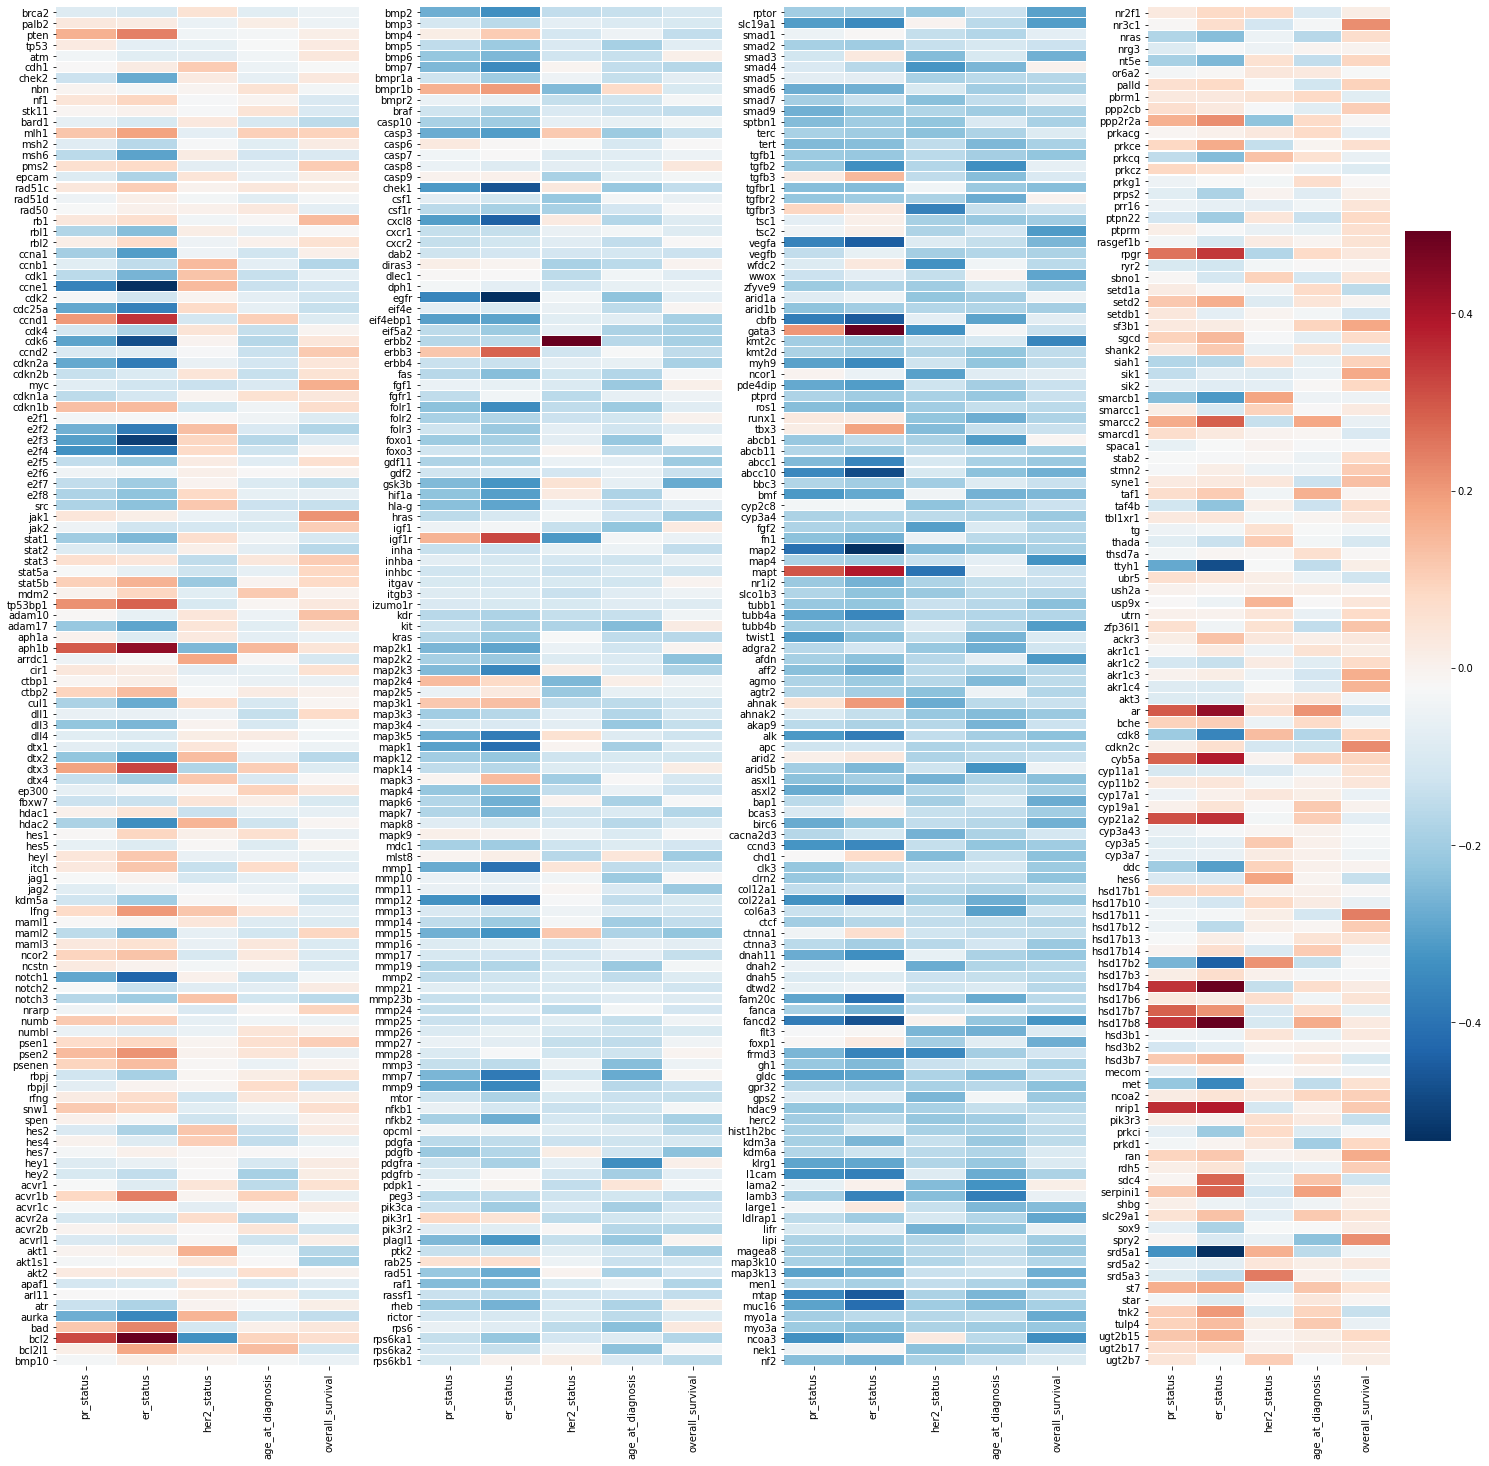

In [ ]:
f, axes = plt.subplots(1, 4, figsize=(25,25), sharex=False)
#plt.figure(figsize=(3,100))
sns.heatmap(corr.iloc[:-6,-6:-1][1:125], cmap = "RdBu_r",linewidths=0.1, cbar = False, ax=axes[0])
sns.heatmap(corr.iloc[:-6,-6:-1][126:250], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[1])
sns.heatmap(corr.iloc[:-6,-6:-1][251:375], cmap = "RdBu_r",linewidths=0.1, cbar = False,ax=axes[2])
sns.heatmap(corr.iloc[:-6,-6:-1][376:489], cmap = "RdBu_r",linewidths=0.1, ax=axes[3])


In [ ]:
df1.iloc[:,20:38]

,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1
0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348
1,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594
2,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398
3,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491
4,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6.0,4.070,IDC,129.800000,0,Positive,0,ER+/HER2- High Prolif,35.0,2.0,Died of Disease,-0.4674,-0.4817,1.0418,0.6514,0.5839,-0.1902,-0.1550
996,4.0,4.020,IDC,201.766667,0,Positive,0,ER+/HER2- Low Prolif,10.0,2.0,Died of Other Causes,0.1849,0.3337,-0.0203,0.7683,0.0186,0.3021,-0.2366
997,4.0,4.028,IDC,286.066667,1,Negative,0,ER-/HER2-,14.0,1.0,Living,-0.5350,0.0992,1.0743,-2.4729,-0.7892,2.2961,0.0324
998,3.0,3.100,IDC,73.466667,0,Positive,0,ER+/HER2- Low Prolif,50.0,2.0,Died of Disease,-0.3409,-1.3123,-0.8363,0.0413,1.7616,-0.7924,-0.0475


In [ ]:
df2 = df1.drop(columns=['patient_id', 'cancer_type', 'cancer_type_detailed', 'cohort'])

In [ ]:
df3 = df2[df2['her2_status_measured_by_snp6'] != 'UNDEF']

In [ ]:
df3['er_status_measured_by_ihc'] = df3['er_status_measured_by_ihc'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df3['her2_status'] = df3['her2_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df3['inferred_menopausal_state'] = df3['inferred_menopausal_state'].apply(lambda x: 1 if "Post" in str(x) else 0)
df3['primary_tumor_laterality'] = df3['primary_tumor_laterality'].apply(lambda x: 1 if "Left" in str(x) else 0)
df3['pr_status'] = df3['pr_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)
df3['er_status'] = df3['er_status'].apply(lambda x: 1 if "Positive" in str(x) else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dummyList = ['cellularity',
             'pam50_+_claudin-low_subtype',
             'neoplasm_histologic_grade',
             #'cancer_type_detailed',
             'tumor_other_histologic_subtype',
             'integrative_cluster',
             #'gene_classifier_subtype',
             'oncotree_code',
             'her2_status_measured_by_snp6',
             '3-gene_classifier_subtype',
             'death_from_cancer'
            ]
df4 = pd.get_dummies(df3, columns=dummyList)

In [ ]:
df4['type_of_breast_surgery'] = df4['type_of_breast_surgery'].apply(lambda x: 1 if "MASTECTOMY" in str(x) else 0)

In [ ]:
df5 = df4.applymap(lambda x: 0 if "0" in str(x) else 1)
df5

,age_at_diagnosis,type_of_breast_surgery,chemotherapy,er_status_measured_by_ihc,er_status,her2_status,hormone_therapy,inferred_menopausal_state,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,pr_status,radio_therapy,tumor_size,tumor_stage,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,...,pam50_+_claudin-low_subtype_Normal,pam50_+_claudin-low_subtype_claudin-low,neoplasm_histologic_grade_1.0,neoplasm_histologic_grade_2.0,neoplasm_histologic_grade_3.0,tumor_other_histologic_subtype_Ductal/NST,tumor_other_histologic_subtype_Lobular,tumor_other_histologic_subtype_Medullary,tumor_other_histologic_subtype_Metaplastic,tumor_other_histologic_subtype_Mixed,tumor_other_histologic_subtype_Mucinous,tumor_other_histologic_subtype_Other,tumor_other_histologic_subtype_Tubular/ cribriform,integrative_cluster_1,integrative_cluster_10,integrative_cluster_2,integrative_cluster_3,integrative_cluster_4ER+,integrative_cluster_4ER-,integrative_cluster_5,integrative_cluster_6,integrative_cluster_7,integrative_cluster_8,integrative_cluster_9,oncotree_code_BREAST,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC,her2_status_measured_by_snp6_GAIN,her2_status_measured_by_snp6_LOSS,her2_status_measured_by_snp6_NEUTRAL,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living
0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,1,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
996,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
997,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
998,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
y = df5["death_from_cancer_Died of Disease"]
X = df5.drop(columns=["overall_survival", "death_from_cancer_Died of Other Causes", "death_from_cancer_Living", "death_from_cancer_Died of Disease"])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
yPred = clf.predict(X_test)
accuracy_score(y_test, yPred)

0.565

In [ ]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)
yPred = logReg.predict(X_test)
accuracy_score(y_test, yPred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gBoostClassifier = GradientBoostingClassifier()
gBoostClassifier.fit(X_train, y_train)
yPred = gBoostClassifier.predict(X_test)
accuracy_score(y_test, yPred)

0.665

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaBoostClassifier = AdaBoostClassifier()
adaBoostClassifier.fit(X_train, y_train)
yPred = adaBoostClassifier.predict(X_test)
accuracy_score(y_test, yPred)

0.625

In [ ]:
import xgboost as xgb 

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20 

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

model = xgb.train(param, D_train, steps)
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.6909814323607427
Recall = 0.59375
Accuracy = 0.69


In [ ]:
X_NN_input = X.transpose()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=724, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
80/80 [==============================] - 14s 2ms/step - loss: 0.6468 - accuracy: 0.6554
Epoch 2/150
80/80 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.6862
Epoch 3/150
80/80 [==============================] - 0s 2ms/step - loss: 0.5547 - accuracy: 0.6870
Epoch 4/150
80/80 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7100
Epoch 5/150
80/80 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.7961
Epoch 6/150
80/80 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8608
Epoch 7/150
80/80 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9379
Epoch 8/150
80/80 [==============================] - 0s 2ms/step - loss: 0.1690 - accuracy: 0.9596
Epoch 9/150
80/80 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9774
Epoch 10/150
80/80 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9896
Epoch 11

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


7/7 [==============================] - 0s 2ms/step - loss: 3.9958 - accuracy: 0.6650
Accuracy: 66.50
